In [ ]:
pip install symspellpy

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.6/2.6 MB 8.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.5/98.5 kB 11.0 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for editdistpy: filename=editdistpy-0.1.4-cp310-cp310-linux_x86_64.whl size=187486 sha256=a492c05e07ef9c40dbea02e76ccd469de2ad2ace3969be1cd14e708b7681c061
  Stored in directory: /root/.cache/pip/wheels/4c/0f/10/c20d67cd765ee5b3666d759a307241bba0663135d6ee1c0072
Successfully built editdistpy


In [ ]:
import pkg_resources #for working with files
from symspellpy import SymSpell, Verbosity  #spelling correction
import re #regular expression

In [ ]:
#r'(.)\1+', r'\1'
#The r before the string ensures it's a raw string for regular expressions.
#(.) creates a capturing group that matches any single character.
#\1+ matches one or more occurrences of the same character captured in the first group.

In [ ]:
def elongation_normalization(text):
  text = text.lower()
  text = re.sub(r'(.)\1{2,}', r"\1\1", text)
  return text
example = "hellooo bagundhiiiiiii, gooood"
elongation_normalization(example)


'helloo bagundhii, good'

In [ ]:
#SymSpell is a Python library designed to perform efficient spelling correction and fuzzy string matching.



In [ ]:
#SymSpell is a Python library designed to perform efficient spelling correction and fuzzy string matching.
sym_spell = SymSpell(max_dictionary_edit_distance=4)
dictionary_path = pkg_resources.resource_filename("symspellpy", "frequency_dictionary_en_82_765.txt")
sym_spell.load_dictionary(dictionary_path, term_index=0, count_index=1)
def eng_spelling_correction(text):
  result = sym_spell.word_segmentation(text)
  return result.corrected_string
example = "thsi isa a lovely movei"
eng_spelling_correction(example)

'this is a lovely movie'

In [ ]:
def transliteration_normalization(text):
  text = re.sub(r'(.)\1{1,}', r"\1", text)
  return text
example = "tinnaavaa sarigga"
transliteration_normalization(example)

'tinava sariga'

In [ ]:
def consonant_normalization(text):

  text = text.replace('kh', 'k')
  text = text.replace('chh', 'ch')
  text = text.replace('gh', 'g')
  text = text.replace('th', 't')
  text = text.replace('jh', 'j')
  text = text.replace('dh', 'd')
  text = text.replace('bh', 'b')
  return text
example = "thinnava jharkand"
consonant_normalization(example)

'tinnava jarkand'

In [ ]:
def data_normalization(text_tuple):
  text = ""
  for tupl in text_tuple:
    word = tupl[0]
    lang = tupl[1]
    word = elongation_normalization(word)
    # for both languages
    if lang == 'en': #english words
      word = eng_spelling_correction(word)
      text += word + " "
    if lang == 'te': # telugu words
      word = transliteration_normalization(word)
      word = consonant_normalization(word)
      text += word + " "
    if lang == 'univ': # universal
      text += word + " "
  return text
example = [('worstttt', 'en'), ('government', 'en'), ('.', 'univ'), ('#YSRCP', 'univ'),
     ('chala', 'te'), ('chethha', 'te'), ('ga', 'te'), ('paripalana', 'te'), ('chesthumdhi', 'te'), ('.', 'univ')]
data_normalization(example)

'worst government . #ysrcp chala cheta ga paripalana chestumdi . '

In [ ]:
labels = []
sents = []
for i in range(0, len(df), 4):
  line1 = df[i]
  line2 = df[i+1]
  text = line1.replace('\n','')
  lang = line2.replace('\n','')
  label, sent = text[:3], text[4:]
  labels.append(label)
  out = [(word, lang) for word, lang in zip(sent.split(), lang.split())]
  sents.append(out)

NameError: name 'df' is not defined

In [ ]:
len(sents)

In [ ]:
import numpy as np
import pandas as pd

In [ ]:
# # Creating Normalised csv file
# import csv

# with open('normalized_data.csv', 'w') as f:
#     writer = csv.writer(f)
#     writer.writerow(['comment', 'label'])
#     for i, tupl_text in enumerate(sents):
#         if i%2500 == 0:
#             print(i)
#         text = data_normalization(tupl_text)
#         label = labels[i]
#         writer.writerow([text, label])

In [ ]:
# import pandas as pd
# normalized_data = pd.read_csv('/content/normalized_data.csv')
# normalized_data.head(10)

In [ ]:
# # @title label
# from matplotlib import pyplot as plt
# import seaborn as sns
# normalized_data.groupby('label').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
# plt.gca().spines[['top', 'right',]].set_visible(False)

In [ ]:
import pandas as pd
data = pd.read_csv('/content/34k_Code_Mixed_Tel-Eng.csv')
# data.label = data.label.map({'NEG':0, 'POS':2,'NTL':1})
data.head()

,comment,label,Unnamed: 2
0,2 5 5 routine revenge story engaging screen pl...,-1,NaN
1,attlakada mana pani manam chedam inka force ok...,0,NaN
2,1 time watch entra movie good,1,NaN
3,covid time lo choose vaalu like esesukondi,0,NaN
4,puneethraj70 ya character wise rgv chala bette...,1,NaN


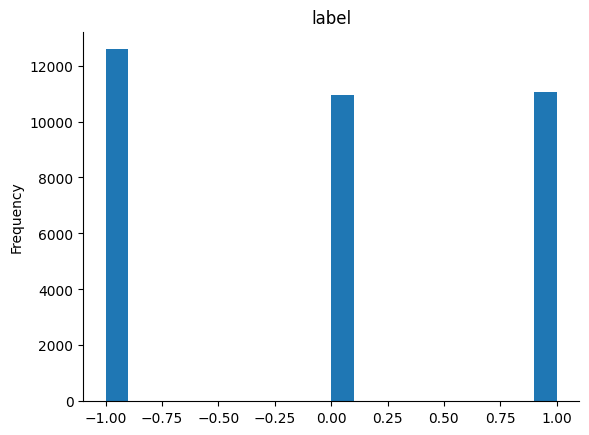

In [ ]:
# @title label

from matplotlib import pyplot as plt
data['label'].plot(kind='hist', bins=20, title='label')
plt.gca().spines[['top', 'right',]].set_visible(False)

In [ ]:
num_rows = len(data)

# Print the number of rows
print("Number of rows:", num_rows)

Number of rows: 34588


In [ ]:
# Assuming `data` is your DataFrame and 'label' is the column containing the labels
# Replace the labels -1, 0, 1 with 0, 1, 2 respectively
data['label'] = data['label'].replace({-1: 0, 0: 1, 1: 2})

# Verify the changes
print(data['label'].unique())

[0 1 2]


In [ ]:
column_name_to_delete = 'Unnamed: 2'
data.drop(columns=[column_name_to_delete], inplace=True)

In [ ]:
# Get the list of column names
columns = data.columns

# Print the list of column names
print(columns)

Index(['comment', 'label'], dtype='object')


In [ ]:
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [ ]:
# stop words
stop_words = set(stopwords.words('english'))
#print(stop_words)
# removing words like no,not,didn`t..etc from stop words
black_list = set(word for word in stop_words if 'no' in word or "'t" in word)
print(black_list)
stop_words = stop_words - black_list

{'not', "won't", 'now', 'no', "wouldn't", "doesn't", "weren't", "needn't", "mustn't", "aren't", "mightn't", "don't", "shouldn't", "couldn't", "didn't", "haven't", 'nor', "wasn't", "shan't", "hadn't", "isn't", "hasn't"}


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
print(tf.__version__)
import os

os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'
tf.random.set_seed(0)

from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Embedding, Dropout, SimpleRNN
from tensorflow.keras.layers import MaxPooling1D
from tensorflow.keras.layers import GRU, LSTM, Bidirectional
from tensorflow.keras.layers import Conv1D, Flatten
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelBinarizer
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
import os
from sklearn import metrics

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


2.15.0


In [ ]:
# Convert NaNs to empty strings
data['comment'] = data['comment'].fillna('')
# Convert non-string values to strings
data['comment'] = data['comment'].astype(str)

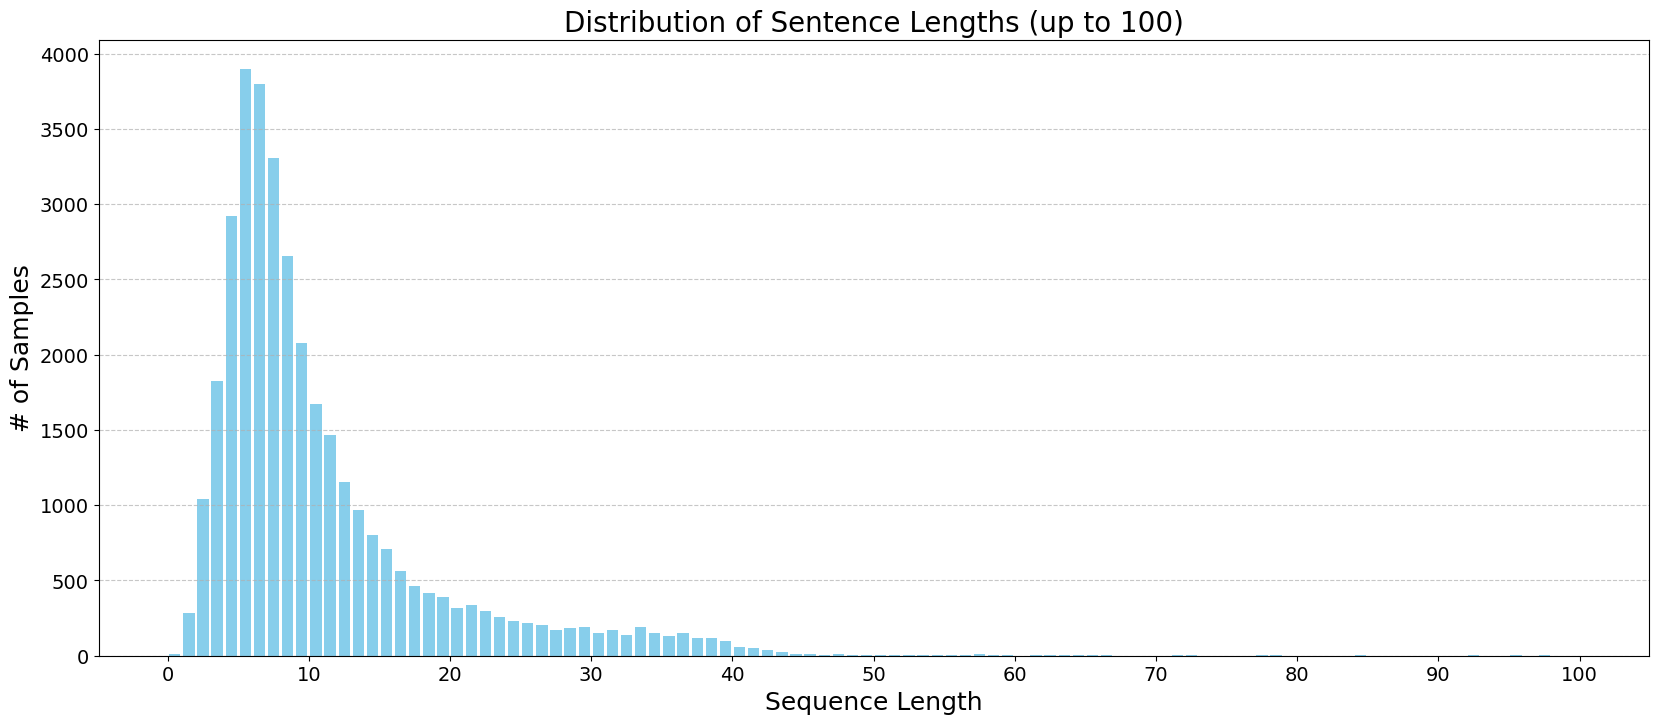

In [ ]:
token_sentence_length = [len(sentence.split()) for sentence in data['comment']]

# Calculate the maximum length for plotting
max_length_plot = 100

# Filter out the sentence lengths greater than max_length_plot
token_sentence_length_filtered = [length for length in token_sentence_length if length <= max_length_plot]

# Plot the distribution
plt.figure(figsize=(20, 8))
plt.hist(token_sentence_length_filtered, bins=max_length_plot, rwidth=0.8, color='skyblue')
plt.xlabel('Sequence Length', fontsize=18)
plt.ylabel('# of Samples', fontsize=18)
plt.xticks(range(0, max_length_plot+1, 10), fontsize=14)
plt.yticks(fontsize=14)
plt.title('Distribution of Sentence Lengths (up to 100)', fontsize=20)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


In [ ]:
vocab_size = 5000
embedding_dim = 300
max_len = 25

batch_size=128
epochs=30

tokenizer = Tokenizer(num_words=vocab_size, oov_token="", lower=True)
binarizer = LabelBinarizer()

In [ ]:
data.fillna('', inplace=True)
labels = data.label.tolist()
sentences = data.comment.tolist()
_= tokenizer.fit_on_texts(sentences)
sequences = tokenizer.texts_to_sequences(sentences)
print(sequences[0])
padded_sequences = pad_sequences(sequences, padding='post', maxlen=max_len)
x_train, x_test, y_train, y_test = train_test_split(
    padded_sequences, labels, stratify=labels, test_size=0.2, random_state=101)

y_train_true = y_train.copy()
y_test_true = y_test.copy()

y_train = binarizer.fit_transform(y_train)
print(x_train[0])
y_test = binarizer.fit_transform(y_test)

[83, 213, 213, 917, 3367, 65, 1, 395, 434, 669, 1]
[  1   1   1 537   1   1 651 368   1   1   1   0   0   0   0   0   0   0
   0   0   0   0   0   0   0]


In [ ]:
def simple_rnn():
    model = Sequential()
    model.add(Embedding(input_dim=vocab_size, output_dim=embedding_dim, input_length=max_len))
    model.add(SimpleRNN(512, return_sequences=True))

    model.add(SimpleRNN(256))
    model.add(Dropout(0.3))
    model.add(Dense(3, activation='softmax'))
    model.compile(loss='categorical_crossentropy', optimizer=Adam(0.0001), metrics='accuracy')
    return model

In [ ]:
# Plot history:
def plot_history(history):
    plt.figure()
    plt.plot(history.history['loss'], label='training data')
    plt.plot(history.history['val_loss'], label='validation data')
    plt.title('LOSS')
    plt.ylabel('Loss')
    plt.xlabel('No. epoch')
    plt.legend(loc="upper left")

    # Plot history: Acc
    plt.figure()
    plt.plot(history.history['accuracy'], label='training data')
    plt.plot(history.history['val_accuracy'], label='validation data')
    plt.title('ACCURACY')
    plt.ylabel('Accuracy')
    plt.xlabel('No. epoch')
    plt.legend(loc="upper left")
    plt.show()


def evaluate_model(trained_model, y_test_true):
    y_test_preds = trained_model.predict(x_test)
    y_test_preds = np.argmax(y_test_preds, axis=1)

    print(metrics.classification_report(y_test_true, y_test_preds))

    cm = metrics.confusion_matrix(y_test_true, y_test_preds, normalize='true')
    sns.heatmap(cm, annot=True, cbar=None, cmap='viridis')
    plt.show()
    f1 = metrics.f1_score(y_test_true, y_test_preds, average='macro')
    return f1

Epoch 1/30
217/217 [==============================] - 84s 380ms/step - loss: 0.7737 - accuracy: 0.6648 - val_loss: 0.6206 - val_accuracy: 0.7540
Epoch 2/30


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


217/217 [==============================] - 81s 375ms/step - loss: 0.5182 - accuracy: 0.8033 - val_loss: 0.5706 - val_accuracy: 0.7855
Epoch 3/30
217/217 [==============================] - 78s 359ms/step - loss: 0.4181 - accuracy: 0.8458 - val_loss: 0.6127 - val_accuracy: 0.7725
Epoch 4/30
217/217 [==============================] - 76s 352ms/step - loss: 0.3541 - accuracy: 0.8698 - val_loss: 0.6462 - val_accuracy: 0.7709
Epoch 5/30
217/217 [==============================] - 82s 377ms/step - loss: 0.2847 - accuracy: 0.8999 - val_loss: 0.6707 - val_accuracy: 0.7780


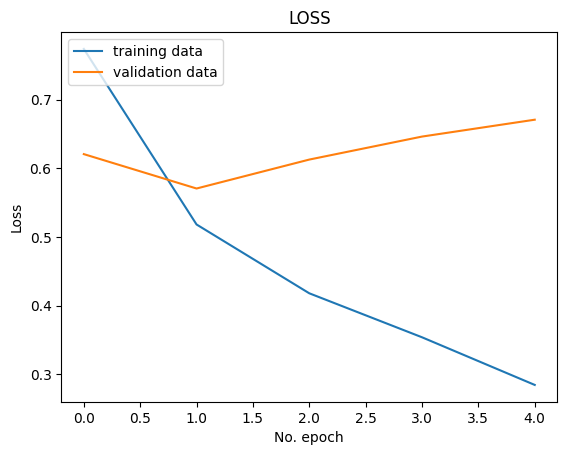

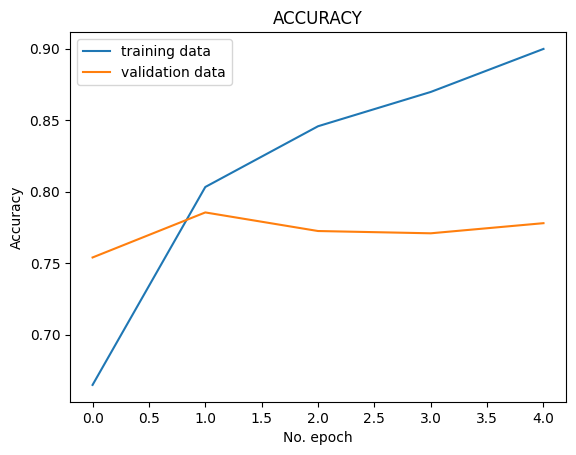

217/217 [==============================] - 10s 45ms/step
              precision    recall  f1-score   support

           0       0.77      0.79      0.78      2517
           1       0.78      0.74      0.76      2189
           2       0.78      0.80      0.79      2212

    accuracy                           0.78      6918
   macro avg       0.78      0.78      0.78      6918
weighted avg       0.78      0.78      0.78      6918



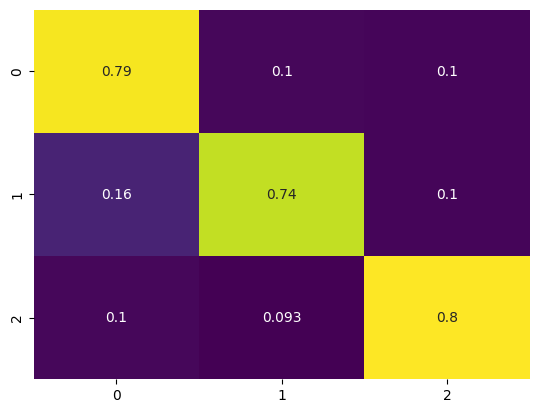

f1 score 0.7773891655635973


In [ ]:
rnn_model = simple_rnn()
checkpoint_path="simple_rnn_model.h5"
keras_callbacks   = [
      EarlyStopping(monitor='val_loss', patience=3, mode='min', min_delta=0.0001),
      ModelCheckpoint(checkpoint_path, monitor='val_loss', save_best_only=True, mode='min')
]
history = rnn_model.fit(
    x_train, y_train, batch_size=batch_size, epochs=epochs, validation_data=(x_test, y_test), callbacks=keras_callbacks)
plot_history(history)
f1 = evaluate_model(rnn_model, y_test_true)
print("f1 score", f1)

In [ ]:
sentence = "vadu manchi director em kaadu, oka hit kuda leduu"

# Convert the single sentence into a list with one element
single_sentence_list = [sentence]

# Convert the sentence into sequences of integers
single_sentence_sequence = tokenizer.texts_to_sequences(single_sentence_list)

# Pad the sequence to ensure fixed length
padded_single_sequence = pad_sequences(single_sentence_sequence, padding='post', maxlen=max_len)
print(padded_single_sequence)

[[ 130   33  254   29 2166   17  179   12    1    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0]]


In [ ]:
def bi_lstm():
    model = Sequential()
    model.add(Embedding(input_dim=vocab_size, output_dim=embedding_dim, input_length=max_len))
    model.add(Bidirectional(LSTM(512, return_sequences=True)))
    model.add(Bidirectional(LSTM(256)))
    model.add(Dropout(0.3))
    model.add(Dense(3, activation='softmax'))
    model.compile(loss='categorical_crossentropy', optimizer=Adam(0.0001), metrics='accuracy')
    return model

Epoch 1/30
217/217 [==============================] - ETA: 0s - loss: 0.8145 - accuracy: 0.6276

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


217/217 [==============================] - 801s 4s/step - loss: 0.8145 - accuracy: 0.6276 - val_loss: 0.5664 - val_accuracy: 0.7785
Epoch 2/30
217/217 [==============================] - 785s 4s/step - loss: 0.5038 - accuracy: 0.8089 - val_loss: 0.5266 - val_accuracy: 0.7966
Epoch 3/30
217/217 [==============================] - 804s 4s/step - loss: 0.4404 - accuracy: 0.8378 - val_loss: 0.5338 - val_accuracy: 0.7956
Epoch 4/30
217/217 [==============================] - 793s 4s/step - loss: 0.4053 - accuracy: 0.8510 - val_loss: 0.5523 - val_accuracy: 0.7947
Epoch 5/30
217/217 [==============================] - 792s 4s/step - loss: 0.3758 - accuracy: 0.8665 - val_loss: 0.5513 - val_accuracy: 0.7985


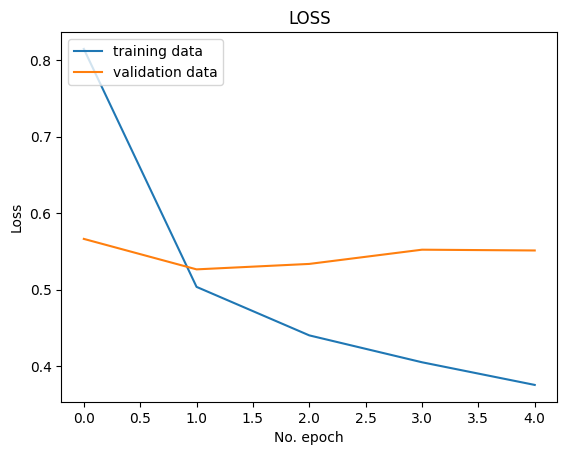

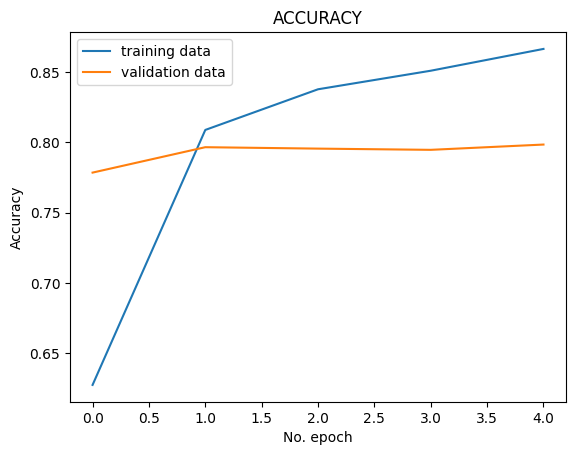

217/217 [==============================] - 69s 312ms/step
              precision    recall  f1-score   support

           0       0.78      0.83      0.81      2517
           1       0.76      0.79      0.77      2189
           2       0.86      0.77      0.81      2212

    accuracy                           0.80      6918
   macro avg       0.80      0.80      0.80      6918
weighted avg       0.80      0.80      0.80      6918



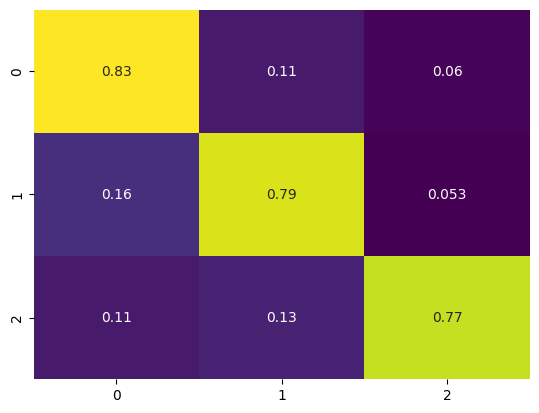

f1 score 0.798302748832849


In [ ]:
bi_lstm_model = bi_lstm()
checkpoint_path="bi_lstm_model.h5"
keras_callbacks   = [
      EarlyStopping(monitor='val_loss', patience=3, mode='min', min_delta=0.0001),
      ModelCheckpoint(checkpoint_path, monitor='val_loss', save_best_only=True, mode='min')
]
history = bi_lstm_model.fit(
    x_train, y_train, batch_size=batch_size, epochs=epochs, validation_data=(x_test, y_test), callbacks=keras_callbacks)

plot_history(history)
f1 = evaluate_model(bi_lstm_model, y_test_true)
print("f1 score", f1)